## Not using RTs to modulate duration or decision and including Miss trials into the decision regressors. Dec = 3s, Cons = cons + minHold

In [1]:
#Opened with --pylab flag
#Need to create code to analyze piot data
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

In [2]:
## Laptop
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData'
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData/test3s'
#filepath = '/Users/frankkanayet/Google Drive/NLineData/Beh_Data'

## Desktop
#filepath = '/Users/frankanayet/Dropbox/NLineExperiment/Data'
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data'
os.chdir(filepath)

In [3]:
print 'Pandas version ' + pd.__version__

Pandas version 0.17.1


In [4]:
filenames = glob.glob('Nline_*.mat')
print filenames
#index to isolate subj numbers
data_dict = {}
for i in filenames:
    id1 = filenames[0].find('_') + 1
    id2 = filenames[0].find('-')
    sub_nbr = i[id1:id2]
    sub_name = i
    s_id = 's_'+sub_nbr
    data_dict[s_id] = io.loadmat(sub_name)

#sub_name = filenames[0] #This will be changed to a loop for all subjects later
#mat = io.loadmat(sub_name)
data_dict.keys()

['Nline_02001-Mar1615.mat', 'Nline_02002-Mar1915.mat', 'Nline_02003-Mar2015a.mat', 'Nline_02004-Mar2315a.mat', 'Nline_02005-Mar2315a.mat', 'Nline_02006-Mar2315a.mat', 'Nline_02007-Mar2415a.mat', 'Nline_02009-Mar2615a.mat', 'Nline_02010-Mar2615a.mat', 'Nline_02011-Mar2615a.mat', 'Nline_02012-Apr0215a.mat', 'Nline_02014-Apr0315a.mat', 'Nline_02015Apr2715a.mat', 'Nline_02016-Apr2715a.mat', 'Nline_02017-Apr2815a.mat', 'Nline_02018-Apr2815a.mat', 'Nline_02019-Apr2915a.mat', 'Nline_02020-May1815a.mat', 'Nline_02021-May2515a.mat', 'Nline_02022-May2515a.mat', 'Nline_02023-May2715a.mat', 'Nline_02024-May2815a.mat', 'Nline_02027-Jun0115a.mat']


['s_02009',
 's_02003',
 's_02002',
 's_02001',
 's_02007',
 's_02006',
 's_02005',
 's_02004',
 's_02018',
 's_02019',
 's_02010',
 's_02011',
 's_02012',
 's_02014',
 's_02015',
 's_02016',
 's_02017',
 's_02024',
 's_02027',
 's_02021',
 's_02020',
 's_02023',
 's_02022']

In [5]:
sub_ex = data_dict.keys()[0]

In [6]:
#data_dict['s_00011']['p']

In [7]:
#for i in data_dict:
#    data_dict[i].pop('__header__')
#    data_dict[i].pop('__version__')
#    data_dict[i].pop('__globals__')
#data_dict['s_00011'].keys()

In [8]:
## The indexes of zeros are as follows [0][0][x][y][z][0] The x y z are the 3 dimensions of the data 3d matrix the zeros are padding
data_dict[sub_ex]['p']['NlineResults'][0][0][0][5][0][0]
len(data_dict[sub_ex]['p']['NlineResults'][0][0][:])

49

In [9]:
data_dict[sub_ex]['p'].dtype.names

('ramp_up',
 'Mean_ITI',
 'Mean_hold',
 'decision',
 'consider',
 'runs',
 'nStim',
 'ntasks',
 'tasks',
 'trialSecs',
 'lineLength',
 'speed',
 'run_order',
 'NlineResults',
 'time_Runs',
 'task_transition',
 'start_Nline',
 'finish_Nline')

In [10]:
cons_time = data_dict[sub_ex]['p']['consider'][0][0][0][0]
dec_time = data_dict[sub_ex]['p']['decision'][0][0][0][0]

In [11]:
new_dat = {}
#new_df = {}
for s in data_dict:
    tasks = ['NlineResults']
    new_dat[s]={}
    #new_df[s] = {}
    for task in tasks:
        dat = data_dict[s]['p'][task]
        num_fields = len(data_dict[s]['p'][task][0][0][0])
        dat_names = []
        for k in range(0,num_fields):
            dat_names.append(dat[0][0][0][k][0][0])
        new_dat[s][task] = {}
        runs = data_dict[s]['p']['runs'][0][0][0][0]
        for run in range(0,runs):
            run_name = 'run'+str(run+1)
            new_dat[s][task][run_name] = {}
            for i in range(0,len(dat_names)):
                new_dat[s][task][run_name][dat_names[i]] = []
                for j in range(0,len(dat[0][0][:])-1):
                    if dat_names[i] == 'catch_probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run])
                    elif dat_names[i] == 'Probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
                    else:
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0][0])
#legible access to the data
Nline = 'NlineResults' #numberline

In [12]:
new_dat[sub_ex]['NlineResults']['run1'].keys()

[u'Slow',
 u'Line_pct',
 u'iti',
 u'TestX',
 u'ITI_onset_real',
 u'consider_onset_real',
 u'ITI_onset',
 u'RT',
 u'hold',
 u'decision_end',
 u'decision_onset_real',
 u'RTHold',
 u'decision_end_real',
 u'Correct',
 u'Wrong',
 u'BadPress',
 u'consider_onset',
 u'Response',
 u'Task',
 u'Trial',
 u'Points',
 u'Error',
 u'catch',
 u'mouse_pos',
 u'Block',
 u'catch_probe',
 u'Probe',
 u'hold_onset',
 u'Move',
 u'decision_onset',
 u'hold_onset_real',
 u'Click']

In [13]:
new_dat[sub_ex]['NlineResults']['run1']['Probe']

[array([57], dtype=uint8),
 array([77], dtype=uint8),
 array([3], dtype=uint8),
 array([21], dtype=uint8),
 array([60], dtype=uint8),
 array([28], dtype=uint8),
 array([85], dtype=uint8),
 array([74], dtype=uint8),
 array([33], dtype=uint8),
 array([7], dtype=uint8),
 array([90], dtype=uint8),
 array([36], dtype=uint8),
 array([11], dtype=uint8),
 array([45], dtype=uint8),
 array([98], dtype=uint8),
 array([65], dtype=uint8),
 array([70], dtype=uint8),
 array([14], dtype=uint8),
 array([80], dtype=uint8),
 array([20], dtype=uint8),
 array([-58], dtype=int16),
 array([-94], dtype=int16),
 array([-86], dtype=int16),
 array([54], dtype=uint8),
 array([-44], dtype=int16),
 array([-78], dtype=int16),
 array([-10], dtype=int16),
 array([48], dtype=uint8),
 array([30], dtype=uint8),
 array([-28], dtype=int16),
 array([96], dtype=uint8),
 array([-34], dtype=int16),
 u'of',
 u'is',
 u'be',
 u'me',
 u'it',
 u'as',
 u'my',
 u'so',
 u'we',
 u'or',
 u'ox',
 u'by',
 u'am',
 u'he',
 u'do',
 u'if']

In [14]:
new_dat[sub_ex]['NlineResults'].keys()

['run1', 'run3', 'run2', 'run4']

In [15]:
new_dat[sub_ex]['NlineResults']['run1']['catch_probe']

[array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), dtype=uint8),
 array([], shape=(0, 0), 

In [16]:
subj = data_dict.keys()
tasks = [Nline]
tuples = []
rows = len(data_dict[sub_ex]['p'][Nline][0][0][:])-1
for s in subj:
    runs = new_dat[s]['NlineResults'].keys()
    for run in runs:
        for i in range(0,rows):
            tuples.append((s, run, i))
len(tuples)
#iterables = [subj,tasks,runs]
indexes = pd.MultiIndex.from_tuples(tuples, names=['Subj', 'Run', 'Trial'])
nline_cols = len(new_dat[sub_ex][Nline]['run1'].keys())

In [17]:
indexes[590]

('s_02007', 'run1', 14)

In [18]:
indexes[1][1]

'run1'

In [19]:
varnames = new_dat[sub_ex][Nline]['run1'].keys()
varnames[24]

u'Block'

In [20]:
len(indexes)

4224

In [21]:
# Code empty cells of probes and catch_probes as Nan
Dic_list = []
probes = ['catch_probe']
for data in indexes:
    temp_dict = {}
    for var in varnames:
        if var == probes[0]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
        else:
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
    Dic_list.append(temp_dict)

In [22]:
#Create dataframe
nline_df = pd.DataFrame(Dic_list, index=indexes)
sum(nline_df.loc[sub_ex].loc['run1'].iloc[0:48]['catch'])

12

In [23]:
nline_df.loc[sub_ex].loc['run1'].iloc[0:10]['Error']

Trial
0   -0.023744
1   -0.025507
2    0.000000
3    0.000000
4   -0.027313
5    0.001938
6   -0.046035
7    0.000000
8    0.070881
9    0.026916
Name: Error, dtype: float64

In [24]:
nline_df.index.names = ['Subject', 'Run', 'Trial']
nline_df.index.names

FrozenList([u'Subject', u'Run', u'Trial'])

In [25]:
test = nline_df['Probe']
for i in range(0,len(test)):
    test[i] = np.ravel(test[i])
    test[i] = test[i][0]
nline_df['Probe'] = test
nline_df['Probe']

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Subject  Run   Trial
s_02009  run1  0         57
               1         77
               2          3
               3         21
               4         60
               5         28
               6         85
               7         74
               8         33
               9          7
               10        90
               11        36
               12        11
               13        45
               14        98
               15        65
               16        70
               17        14
               18        80
               19        20
               20       -58
               21       -94
               22       -86
               23        54
               24       -44
               25       -78
               26       -10
               27        48
               28        30
               29       -28
                       ... 
s_02022  run4  18        or
               19        my
               20        of
               21        we

### Create Stim Labels

In [26]:
#now nline
#nline_df['Num'] = nline_df['Num'].map('{:.0f}'.format)
#nline_df['Denom'] = nline_df['Denom'].map('{:.0f}'.format)
#nline_df['Stim'] = nline_df['Num']+'/'+nline_df['Denom']
#nline_df['Stim']

In [27]:
nline_df.columns

Index([u'BadPress', u'Block', u'Click', u'Correct', u'Error', u'ITI_onset',
       u'ITI_onset_real', u'Line_pct', u'Move', u'Points', u'Probe', u'RT',
       u'RTHold', u'Response', u'Slow', u'Task', u'TestX', u'Trial', u'Wrong',
       u'catch', u'catch_probe', u'consider_onset', u'consider_onset_real',
       u'decision_end', u'decision_end_real', u'decision_onset',
       u'decision_onset_real', u'hold', u'hold_onset', u'hold_onset_real',
       u'iti', u'mouse_pos'],
      dtype='object')

In [28]:
#Make task as string
nline_df['Task'] = nline_df['Task'].astype(str)
nline_df['Task'][nline_df['Task']=='1'] = 'Pos'
nline_df['Task'][nline_df['Task']=='2'] = 'Neg'
nline_df['Task'][nline_df['Task']=='3'] = 'Word'
nline_df['Task'].iloc[16]

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'Neg'

In [29]:
nline_df['Dist0'] = abs(nline_df['Line_pct'] - 0)
nline_df['Dist100'] = abs(nline_df['Line_pct'] - 1)
nline_df['Dist50'] = abs(nline_df['Line_pct'] - 0.5)
nline_df['LandmarkDist'] = nline_df[['Dist0','Dist100','Dist50']].min(axis=1) 
nline_df['LandmarkDist']

Subject  Run   Trial
s_02009  run1  0        0.07
               1        0.23
               2        0.03
               3        0.21
               4        0.10
               5        0.22
               6        0.15
               7        0.24
               8        0.17
               9        0.07
               10       0.10
               11       0.14
               12       0.11
               13       0.05
               14       0.02
               15       0.15
               16       0.15
               17       0.07
               18       0.10
               19       0.10
               20       0.21
               21       0.03
               22       0.07
               23       0.23
               24       0.22
               25       0.11
               26       0.05
               27       0.24
               28       0.15
               29       0.14
                        ... 
s_02022  run4  18       0.15
               19       0.03
               20     

##Get means for demeaning

In [30]:
nline_df['LandmarkDist'] = np.round(nline_df['LandmarkDist'],2)
uniquevals = nline_df.loc['s_02007'].loc['run1']['LandmarkDist'].unique()
landmark_mean = uniquevals.mean()

In [31]:
nline_df['Dist50'] = np.round(nline_df['Dist50'],2)
uniquevals50 = nline_df.loc['s_02007'].loc['run1']['Dist50'].unique()
dist50_mean = uniquevals50.mean()

In [32]:
nline_df['Dist0'] = np.round(nline_df['Dist0'],2)
uniquevals0 = nline_df.loc['s_02007'].loc['run1']['Dist0'].unique()
dist0_mean = uniquevals0.mean()

In [33]:
dist0_mean

0.49375000000000002

# Create Onset Files

In [34]:
nline_df['Missed'] = 0

In [35]:
nline_df['Missed'][(nline_df.catch < 1) & (nline_df.Error == 1)] = 1

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
nline_df[['consider_onset', 'consider_onset_real',
         'decision_onset', 'decision_onset_real']] = nline_df[['consider_onset',
                                                                  'consider_onset_real',
                                                                  'decision_onset', 'decision_onset_real']] -16

In [37]:
nline_df.decision_end = nline_df.decision_end - 16

In [38]:
nline_df.decision_end.max()

586.0

In [39]:
nline_df.loc[nline_df.index.get_level_values('Run') == 'run2',
             ['consider_onset', 'consider_onset_real',
              'decision_onset', 'decision_onset_real']]= nline_df.loc[nline_df.index.get_level_values('Run') == 'run2',
                                                                      ['consider_onset', 'consider_onset_real',
                                                                       'decision_onset',
                                                                       'decision_onset_real']]+(nline_df.decision_end.max()
                                                                                                * (2-1))

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py:212: PerformanceWarning: indexing past lexsort depth may impact performance.
  handler(stream, idents, msg)


In [40]:
nline_df.loc[nline_df.index.get_level_values('Run') == 'run3',
             ['consider_onset', 'consider_onset_real',
              'decision_onset', 'decision_onset_real']]= nline_df.loc[nline_df.index.get_level_values('Run') == 'run3',
                                                                      ['consider_onset', 'consider_onset_real',
                                                                       'decision_onset',
                                                                       'decision_onset_real']]+(nline_df.decision_end.max()
                                                                                                * (3-1))

In [41]:
nline_df.loc[nline_df.index.get_level_values('Run') == 'run4',
             ['consider_onset', 'consider_onset_real',
              'decision_onset', 'decision_onset_real']]= nline_df.loc[nline_df.index.get_level_values('Run') == 'run4',
                                                                      ['consider_onset', 'consider_onset_real',
                                                                       'decision_onset',
                                                                       'decision_onset_real']]+(nline_df.decision_end.max()
                                                                                                * (4-1))

In [42]:
(nline_df.decision_onset.max()+3)/2

1172.0

In [43]:
nline_df = nline_df.sort_index(level=(0,1,2))

In [55]:
import string

vals = ['Sm_Land','Lg_Land']
val_dict = {'Sm_Land':[0,0.125],'Lg_Land':[0.125,0.25]}
tasks = nline_df.groupby('Task')
labels = tasks.indices.keys()
phase = ['cons', 'dec']
dec_ctch_onset = {}
big_dict = {}

# Breaks always happen at the same time in the sequence
break_onset = [[190, 6, 1],[388, 6, 1]]

for s in nline_df.index.levels[0]:
    print s
    big_dict[s] = {}
    dec_ctch_onset[s] = {}
    ctch = nline_df.loc[s]['catch']
    problem_con = nline_df.loc[s]['consider_onset_real'] - nline_df.loc[s]['consider_onset']
    problem_dec = nline_df.loc[s]['decision_onset_real'] - nline_df.loc[s]['decision_onset']
    prob_con_idx = problem_con > 0.5
    prob_dec_idx = problem_dec > 0.5
    if len(nline_df.loc[s]['hold']) == 0:
        hold = 2.5
    else:
        hold = min(nline_df.loc[s]['hold'])
    dec_ctch_tmp = nline_df.loc[s]['decision_onset_real']
    dec_ctch_tmp = dec_ctch_tmp[ctch==1]
    dec_ctch_tmp = dec_ctch_tmp[prob_dec_idx==0]
    #big_dict[s]['dec_ctch_onset'] = pd.DataFrame.from_items([('time',dec_ctch_tmp[dec_ctch_tmp>=0]),('duration',dec_time),('val',1)])
    cons_duration = hold + cons_time
        
    bad_trials_con = nline_df.loc[s]['consider_onset']
    bad_trials_con = bad_trials_con[prob_con_idx==1]
    #big_dict[s]['con_bad_trials'] = pd.DataFrame.from_items([('time',bad_trials_con[bad_trials_con>=0]),('duration',dec_time),('val',1)])
        
    bad_trials_dec = nline_df.loc[s]['decision_onset']
    bad_trials_dec = bad_trials_dec[prob_dec_idx==1]
    #big_dict[s]['dec_bad_trials'] = pd.DataFrame.from_items([('time',bad_trials_dec[bad_trials_dec>=0]),('duration',dec_time),('val',1)])


    for lab in labels:
        for lab in labels:
            #print lab
            big_dict[s][lab] = {}
            Task = nline_df.loc[s]['Task']
            
            #create landmark values (demeaned)
            landmark = nline_df.loc[s]['LandmarkDist']
            #landmark = landmark[Task==lab] - landmark_mean
            
            for ph in phase:
                if ph == 'dec':
                    big_dict[s][lab][ph] = {}
                    for val in vals:
                        big_dict[s][lab][ph][str(val)] = {}
                        prorblem_dec = nline_df.loc[s]['decision_onset_real'] - nline_df.loc[s]['decision_onset']
                        prob_dec_idx = problem_dec > 0.5
                        tmp_int = nline_df.loc[s]['decision_onset_real']
                        #tmp_int = tmp_int[ctch==0]
                        tmp_int = tmp_int[Task==lab]
                        #tmp_int = tmp_int[prob_dec_idx == 0]
                        tmp_int = tmp_int[(landmark>=val_dict[val][0]) & (landmark<=val_dict[val][1])] 
                        big_dict[s][lab][ph][str(val)] = pd.DataFrame.from_items([('time',tmp_int[tmp_int>=0]),('duration',dec_time),('val',1)])
                elif ph == 'cons':
                    big_dict[s][lab][ph] = {}
                    for val in vals:
                        big_dict[s][lab][ph][str(val)] = {}
                        prorblem_con = nline_df.loc[s]['consider_onset_real'] - nline_df.loc[s]['consider_onset']
                        prob_con_idx = problem_con > 0.5
                        tmp_int = nline_df.loc[s]['consider_onset_real']
                        tmp_int = tmp_int[Task==lab]
                        #tmp_int = tmp_int[prob_con_idx == 0]
                        tmp_int = tmp_int[(landmark>=val_dict[val][0]) & (landmark<=val_dict[val][1])] 
                        big_dict[s][lab][ph][str(val)] = pd.DataFrame.from_items([('time',tmp_int[tmp_int>=0]),('duration',cons_duration),('val',1)])

s_02001
s_02002
s_02003
s_02004
s_02005
s_02006
s_02007
s_02009
s_02010
s_02011
s_02012
s_02014
s_02015
s_02016
s_02017
s_02018
s_02019
s_02020
s_02021
s_02022
s_02023
s_02024
s_02027


In [50]:
landmark_mean

0.13384615384615384

In [54]:
big_dict['s_02003']['Word']

{'cons': {'Lg_Land':                    time  duration  val
  Run  Trial                            
  run1 32      397.516835         3    1
       33      411.007415         3    1
       34      423.508041         3    1
       39      477.522041         3    1
       42      514.014721         3    1
       43      530.010287         3    1
       44      543.006941         3    1
       45      557.008893         3    1
  run2 0       588.519764         3    1
       2       614.004626         3    1
       3       624.505866         3    1
       4       636.504792         3    1
       6       660.011295         3    1
       9       695.003787         3    1
       10      707.017855         3    1
       13      745.503988         3    1
  run3 17     1387.507782         3    1
       20     1421.010909         3    1
       21     1437.014779         3    1
       22     1448.513395         3    1
       23     1460.003788         3    1
       26     1495.003481         3   

In [94]:
big_dict['s_02014']['Word']

{'cons': {'Lg_Land':                    time  duration  val
  Run  Trial                            
  run1 17      209.002342         3    1
       19      229.001914         3    1
       20      243.001112         3    1
       21      256.501019         3    1
       23      283.001637         3    1
       24      296.502115         3    1
       26      320.501171         3    1
       29      356.001834         3    1
  run2 34     1009.001853         3    1
       35     1023.502463         3    1
       37     1049.001588         3    1
       39     1070.001447         3    1
       40     1081.001857         3    1
       43     1115.308232         3    1
       46     1151.500906         3    1
       47     1162.502112         3    1
  run3 16     1374.501414         3    1
       19     1412.501372         3    1
       20     1425.001028         3    1
       21     1437.000964         3    1
       23     1462.002327         3    1
       24     1473.000984         3   

In [95]:
big_dict['s_02014']['dec_bad_trials']

KeyError: 'dec_bad_trials'

## Save Files

In [96]:
for s in big_dict.keys():
    print s
    #Laptop
    #path = '/Users/frankkanayet/Google Drive/NLineData/Beh_Data/OnsetFiles_LandmarksFull'
    #path = '/Users/frankkanayet/Google Drive/NLineData/Beh_Data/OnsetFiles_LandmarksFull/'+s+'/'
    #Desktop
    path = '/Users/frankanayet/Google Drive/NLineData/Beh_Data/OnsetFiles_Landmark_2groups'
    path = '/Users/frankanayet/Google Drive/NLineData/Beh_Data/OnsetFiles_Landmark_2groups/'+s+'/'
    os.makedirs(path)
    #dec_ctch_filename = s+'_DEC_CTCH'+'.txt'
    con_bad_trial = s+'_Con_Bad'+'.txt'
    dec_bad_trial = s+'_Dec_Bad'+'.txt'
    #dec_ctch_pathfile = path+dec_ctch_filename
    con_bad_trial_pathfile = path+con_bad_trial
    dec_bad_trial_pathfile = path+dec_bad_trial
    #big_dict[s]['dec_ctch_onset'].to_csv(dec_ctch_pathfile, sep='\t', header=False, index=False)
    #big_dict[s]['dec_bad_trials'].to_csv(dec_bad_trial_pathfile, sep='\t', header=False, index=False)
    #big_dict[s]['con_bad_trials'].to_csv(con_bad_trial_pathfile, sep='\t', header=False, index=False)
    #del big_dict[s]['dec_ctch_onset']
    #del big_dict[s]['dec_bad_trials']
    #del big_dict[s]['con_bad_trials']
    for lab in big_dict[s].keys():
        print lab
        for ph in big_dict[s][lab].keys():
            print ph
            for val in big_dict[s][lab][ph].keys():
                print val
                filename = s+'_'+lab+'_'+ph+'_'+val+'.txt'
                pathfile = path+filename
                big_dict[s][lab][ph][val].to_csv(pathfile, sep='\t', header=False, index=False)

s_02009
Neg
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Word
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Pos
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
s_02003
Neg
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Word
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Pos
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
s_02002
Neg
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Word
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Pos
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
s_02001
Neg
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Word
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Pos
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
s_02007
Neg
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Word
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Pos
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
s_02006
Neg
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Word
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Pos
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
s_02005
Neg
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Word
cons
Lg_Land
Sm_Land
dec
Lg_Land
Sm_Land
Pos
cons
Lg_Land
Sm_Land
dec
Lg_Land


In [97]:
#Save Break onset file
path = '/Users/frankanayet/Google Drive/NLineData/Beh_Data/OnsetFiles_Landmark_2groups/'
#Desktop
break_onset = pd.DataFrame.from_items([('time',[190, 388]),('duration',[6,6]),('val',[1,1])])
break_filename = 'Break_onsets.txt'
break_pathfile = path+break_filename
break_onset.to_csv(break_pathfile, sep='\t', header=False, index=False)

In [108]:
nline_df.loc[nline_df['Task'] == 'Word', ['Subject', 'Probe', 'Line_pct']].groupby(['Probe']).mean()

,Subject,Line_pct
Probe,,
am,NaN,0.519545
as,NaN,0.480909
be,NaN,0.501705
by,NaN,0.499205
do,NaN,0.490114
he,NaN,0.495000
if,NaN,0.528977
is,NaN,0.512273
it,NaN,0.563523


In [148]:
new_df = pd.read_csv('nline_data.csv', delimiter='\t')

In [149]:
new_df = new_df.loc[new_df['Task']==3,['Subject', 'Probe', 'Line_pct']]

In [150]:
new_df.groupby(['Subject', 'Probe'])['Line_pct'].mean()

Subject  Probe
s_02003  am       0.5450
         as       0.4300
         be       0.2700
         by       0.4525
         do       0.5375
         he       0.4600
         if       0.6500
         is       0.6250
         it       0.4050
         me       0.7075
         my       0.4700
         of       0.4675
         or       0.2575
         ox       0.7025
         so       0.5175
         we       0.4025
s_02004  am       0.8150
         as       0.5275
         be       0.7450
         by       0.5950
         do       0.5875
         he       0.4375
         if       0.5075
         is       0.5800
         it       0.5175
         me       0.2925
         my       0.5525
         of       0.4650
         or       0.3875
         ox       0.4725
                   ...  
s_02024  be       0.3900
         by       0.3050
         do       0.4725
         he       0.4475
         if       0.2375
         is       0.2825
         it       0.5975
         me       0.6000
         m

In [153]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

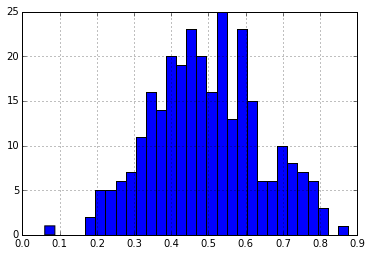

In [156]:
new_df.groupby(['Subject', 'Probe'])['Line_pct'].mean().hist(bins=30)